Author: Shachi

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline
from math import sqrt 
import warnings
from collections import Counter 
from scipy.stats import norm
from scipy.optimize import minimize
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Information 1: No information regarding paid reach or impressions

In [5]:
df1 = pd.read_csv('/content/insight_001.csv')
df1.shape
df2 = pd.read_excel('/content/insight_002.xlsx')
df2.shape

(292, 33)

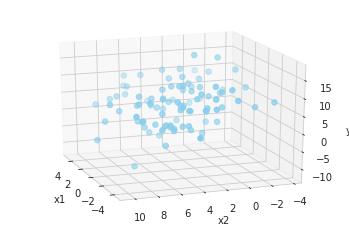

In [6]:

np.random.seed(51)

real_mean = [1, 3, 5]
real_cov = np.matrix([[4, 1, 2], [1, 9, -4], [2, -4, 21]])

n = 100
data = np.random.multivariate_normal(mean = real_mean, cov = real_cov, size = n)
sns.set_style("whitegrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c='skyblue', s=30)
ax.view_init(20, 160)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

Type
Link           [70, 0, 0, 0, 0, 0, 0, 0, 0, 48, 161, 310, 41,...
Photo          [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SharedVideo    [94, 64, 141, 147, 70, 139, 76, 31, 18, 22, 28...
Status         [0, 0, 0, 0, 0, 0, 0, 217, 849, 18, 166, 151, ...
Video          [148, 245, 630, 342, 162, 238, 348, 242, 375, ...
Name: Lifetime Engaged Users, dtype: object
{'Link': 1120, 'Photo': 27067, 'SharedVideo': 1066, 'Status': 2523, 'Video': 13853}


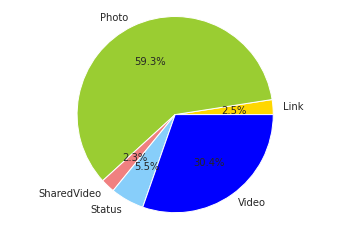

In [7]:
#df2[['Type', 'Lifetime Engaged Users']]
labels = []
sizes = []

#print(df2.Type.value_counts())
#print(df2['Lifetime Engaged Users'].value_counts())

result = df2.groupby('Type')['Lifetime Engaged Users'].apply(list)
print(result)

sum_result_dict={}

for Type,users in result.items():
     sum_result_dict[Type]=sum(users)
     labels.append(Type)
     sizes.append(sum_result_dict[Type])

print(sum_result_dict)



colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue']
explode = (0, 0, 0, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=False)

plt.axis('equal')
plt.show()

what triggers

In [8]:

pattern1='Paid'
pattern2='Promoted'
#unpaid marketing column pattern
pattern3='Organic'

starting= 1010
ending  = 1011+24

# for i in range(starting,ending):
#      print(new_df1.columns[i])

x=[]
y=[]

new_df1=df1.tail(-1)

for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    if(feature.__contains__(pattern1) or feature.__contains__(pattern2) or  feature.__contains__(pattern3)):

            result = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            print(feature)
            x.append(feature)
            y.append(sum(result.astype(int)))
        


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Text(0.5, 0, 'X axis')

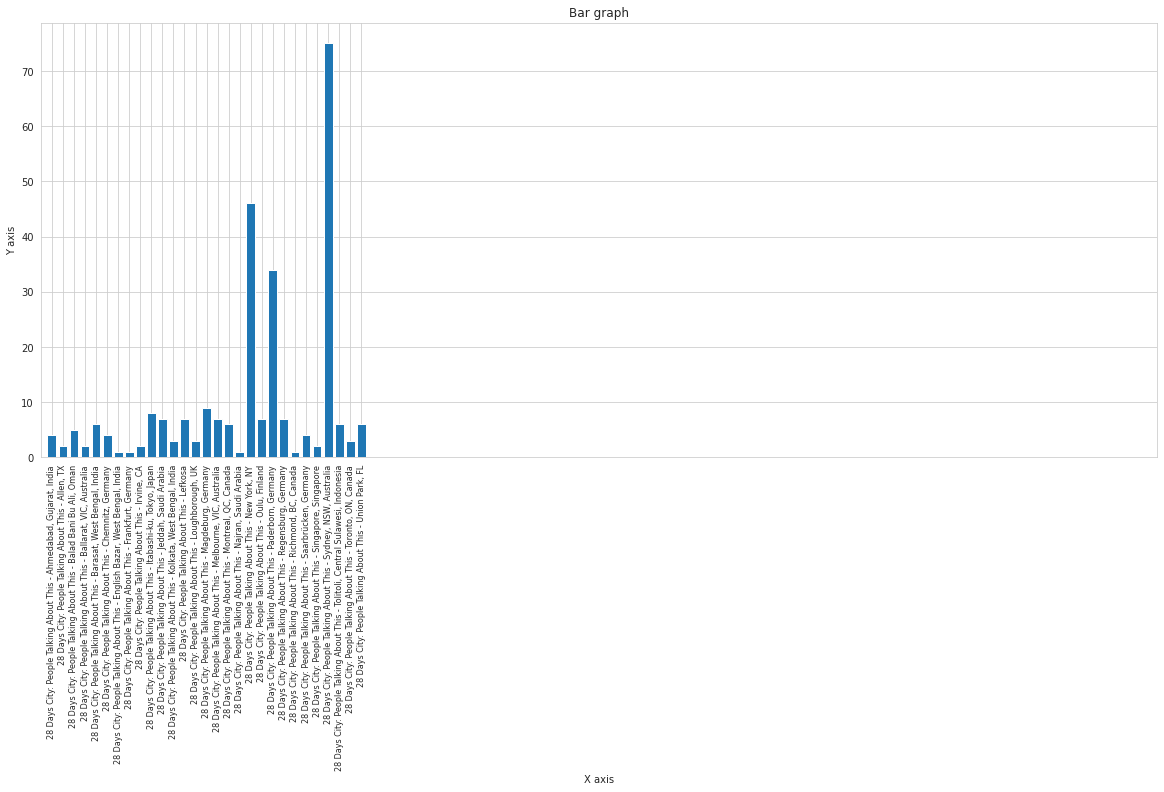

In [9]:
starting= 813
ending  = 913

pattern1='28 Days City: People Talking About This'
pattern2='Bangladesh'

x=[]
y=[]

x1=[]
y1=[]

for i in range(starting,ending):
    #print(new_df1.columns[i])
    feature=new_df1.columns[i]
    if(feature.__contains__(pattern1) and  feature.__contains__(pattern2)==False):
            new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            x1.append(feature)
            y1.append(sum(new_df1[feature].astype(int)))
    if(feature.__contains__(pattern1) and  feature.__contains__(pattern2)):

            new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
            #print(new_df1[feature])
            x.append(feature)
            y.append(sum(new_df1[feature].astype(int)))
        


# Set the figure size
fig = plt.figure(10, [20, 8])
ax = fig.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,100)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=8, rotation='vertical')


plt.bar(x1, y1) 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


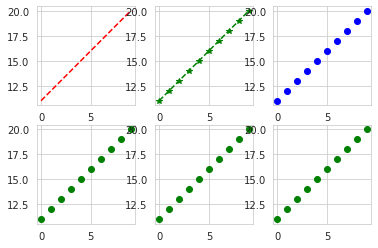

In [10]:
attributes=['Lifetime Total Likes','28 Days Page Engaged Users','28 Days Total Reach',
            '28 Days Viral Reach','28 Days Viral impressions','28 Days Total Impressions']
x=[]
y=[]



for feature in attributes:
    
    new_df1[feature] = new_df1[feature].fillna(0, inplace=False)
    #print(new_df1[feature])
    #print(feature)
    x.append(feature)
    y.append(sum(new_df1[feature].astype(int)))


x=np.arange(0,10)
y=np.arange(11,21)

# 

plt.subplot(2,3,1)
plt.plot(x,y,'r--')
plt.subplot(2,3,2)
plt.plot(x,y,'g*--')
plt.subplot(2,3,3)
plt.plot(x,y,'bo')
plt.subplot(2,3,4)
plt.plot(x,y,'go')
plt.subplot(2,3,5)
plt.plot(x,y,'go')
plt.subplot(2,3,6)
plt.plot(x,y,'go')

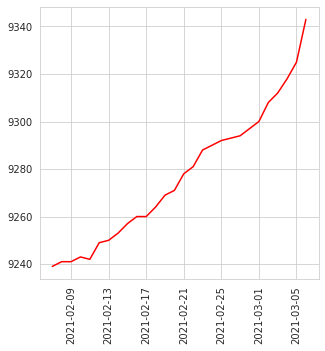

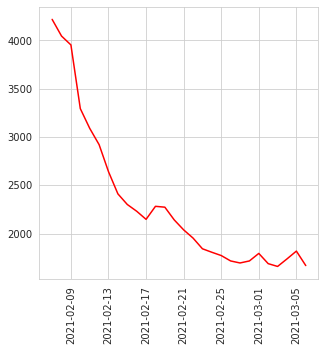

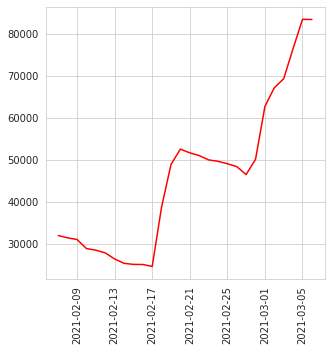

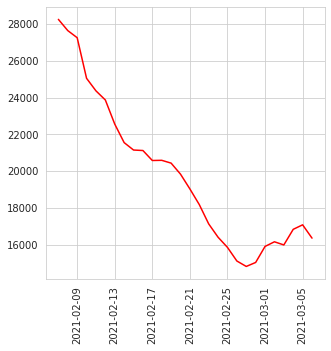

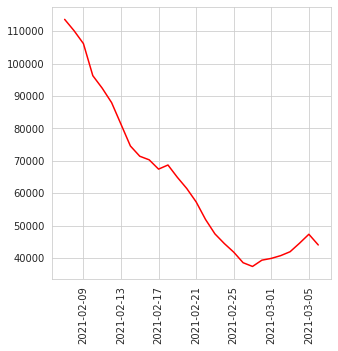

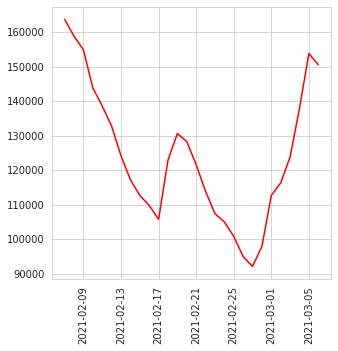

In [11]:

attributes=['Lifetime Total Likes','28 Days Page Engaged Users','28 Days Total Reach',
            '28 Days Viral Reach','28 Days Viral impressions','28 Days Total Impressions']



dates = [pd.to_datetime(d) for d in new_df1['Date']]

cnt=0
for feature in attributes:
    cnt+=1
    
    plt.subplots(1,1,figsize=(5,5))
    plt.plot(dates,new_df1[feature].astype(int),'r')
    plt.xticks(rotation = 'vertical')


(array([737830., 737834., 737838., 737842., 737846., 737850., 737854.]),
 <a list of 7 Text major ticklabel objects>)

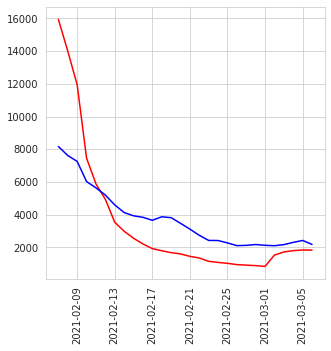

In [20]:
attributes=['28 Days Total Video Views', '28 Days Total Impressions',
              '28 Days Page Consumptions']



dates = [pd.to_datetime(d) for d in new_df1['Date']]

cnt=0
plt.subplots(1,1,figsize=(5,5))
plt.plot(dates,new_df1[attributes[0]].astype(int),'r')
plt.plot(dates,new_df1[attributes[2]].astype(int),'b')
plt.xticks(rotation = 'vertical')


In [ ]:
f, axs = plt.subplots(2,2,figsize=(15,15))